In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [57]:
#0 offset data anaylsis

#read in data
def read_data(filename):
    sizes =  [100, 200, 500, 1000, 2000]
    columns = ["Points","50th", "25th", "1st"]
    df_loops = pd.DataFrame(columns=columns)
    df_loops.set_index("Points", inplace=True)
    df_clock = pd.DataFrame(columns=columns)
    df_clock.set_index("Points", inplace=True)

    for size in sizes:
        df_50 = pd.DataFrame(columns=["loops", "clock"])
        with open(filename + "/test_" +str(size) + "_points/2.txt") as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            lines = [line.split(" ") for line in lines]
            for line in lines:
                df_50.loc[len(df_50)] = line
        df_50["loops"] = df_50["loops"].astype(int)
        df_50["clock"] = df_50["clock"].astype(int)

        df_25 = pd.DataFrame(columns=["loops", "clock"])
        with open(filename + "/test_" +str(size) + "_points/4.txt") as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            lines = [line.split(" ") for line in lines]
            for line in lines:
                df_25.loc[len(df_25)] = line
        df_25["loops"] = df_25["loops"].astype(int)
        df_25["clock"] = df_25["clock"].astype(int)

        df_1 = pd.DataFrame(columns=["loops", "clock"])
        with open(filename + "/test_" +str(size) + "_points/100.txt") as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            lines = [line.split(" ") for line in lines]
            for line in lines:
                df_1.loc[len(df_1)] = line
        df_1["loops"] = df_1["loops"].astype(int)
        df_1["clock"] = df_1["clock"].astype(int)

        #log each data point in df_loops and df_clock
        print(df_25["loops"].sum(), df_25["loops"].count())
        df_loops.loc[size] = [df_50["loops"].mean(), df_25["loops"].mean(), df_1["loops"].mean()]
        df_clock.loc[size] = [df_50["clock"].mean(), df_25["clock"].mean(), df_1["clock"].mean()]
    return df_loops, df_clock
df_loops_no_offset, df_clock_no_offset = read_data("0_offset_100_std")

1259 100
1171 100
1159 100
954 100
1138 100


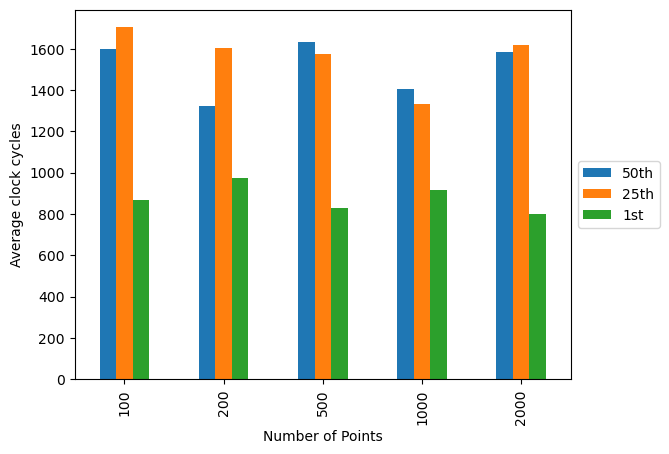

In [58]:

plt.xlabel("Number of Points")
plt.ylabel("Average clock cycles")
# move legend to outside of plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [59]:
df_loops_200_offset, df_clock_200_offset = read_data("./200_offset_100_std")

1582 100
1470 100
959 100
1865 100
1578 100


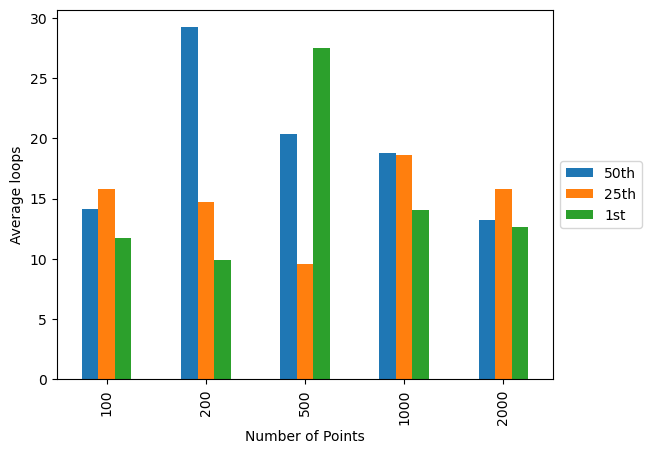

In [60]:
df_loops_200_offset.plot.bar()
plt.xlabel("Number of Points")
plt.ylabel("Average loops")
# move legend to outside of plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Average loops')

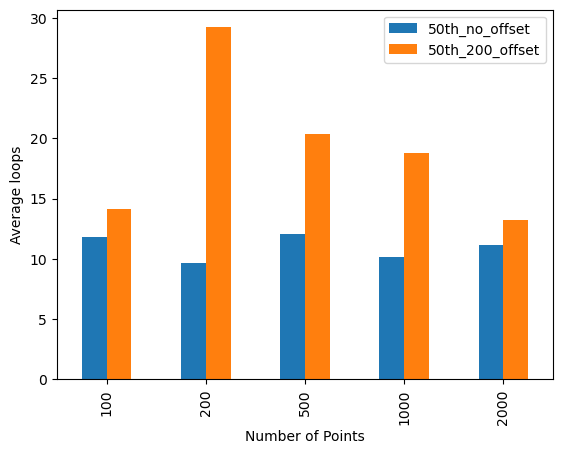

In [76]:
# merge dataframes
df_loops = df_loops_no_offset.merge(df_loops_200_offset, left_index=True, right_index=True, suffixes=("_no_offset", "_200_offset"))

df_clock = df_clock_no_offset.merge(df_clock_200_offset, left_index=True, right_index=True, suffixes=("_no_offset", "_200_offset"))

# plot dataframes
df_loops[["50th_no_offset", "50th_200_offset",]].plot.bar()
plt.xlabel("Number of Points")
plt.ylabel("Average loops")